### Load data

In [ ]:
# Import all necessary libraries
import psycopg2
from sql import engine #adjust this as necessary to match your sql.py connection methods
# Import connection parameters: host, port, database, user, password
import sqlalchemy
from sql import host, port, database, user, password

conn = psycopg2.connect(host=host,
                        port=port,
                        database=database,
                        user=user,
                        password=password)

print(conn)

In [220]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [221]:
# calling the complaints table from sql

sql_query = 'SELECT * FROM cap_air.complaints_year_all'
df_complaints_all = pd.read_sql_query(sql_query, conn)

display(df_complaints_all)


,date_year,year,city,complaints,complainants
0,2017-01-01,2017,Frankfurt,5915945.0,2203.0
1,2017-01-01,2017,Hamburg,107157.0,1950.0
2,2017-01-01,2017,Hannover,3845.0,NaN
3,2018-01-01,2018,Frankfurt,962620.0,3115.0
4,2018-01-01,2018,Hamburg,166943.0,2311.0
5,2018-01-01,2018,Hannover,4756.0,NaN
6,2019-01-01,2019,Frankfurt,750646.0,2037.0
7,2019-01-01,2019,Hamburg,317998.0,1517.0
8,2019-01-01,2019,Hannover,1900.0,NaN
9,2020-01-01,2020,Frankfurt,254793.0,1274.0


In [222]:
# showing the shape of our datasets
display(df_complaints_all.shape)
display(df_complaints_all.info())

(15, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_year     15 non-null     datetime64[ns]
 1   year          15 non-null     int64         
 2   city          15 non-null     object        
 3   complaints    13 non-null     float64       
 4   complainants  8 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 728.0+ bytes


None

In [223]:
df_complaints_all

,date_year,year,city,complaints,complainants
0,2017-01-01,2017,Frankfurt,5915945.0,2203.0
1,2017-01-01,2017,Hamburg,107157.0,1950.0
2,2017-01-01,2017,Hannover,3845.0,NaN
3,2018-01-01,2018,Frankfurt,962620.0,3115.0
4,2018-01-01,2018,Hamburg,166943.0,2311.0
5,2018-01-01,2018,Hannover,4756.0,NaN
6,2019-01-01,2019,Frankfurt,750646.0,2037.0
7,2019-01-01,2019,Hamburg,317998.0,1517.0
8,2019-01-01,2019,Hannover,1900.0,NaN
9,2020-01-01,2020,Frankfurt,254793.0,1274.0


Ploting cities by year

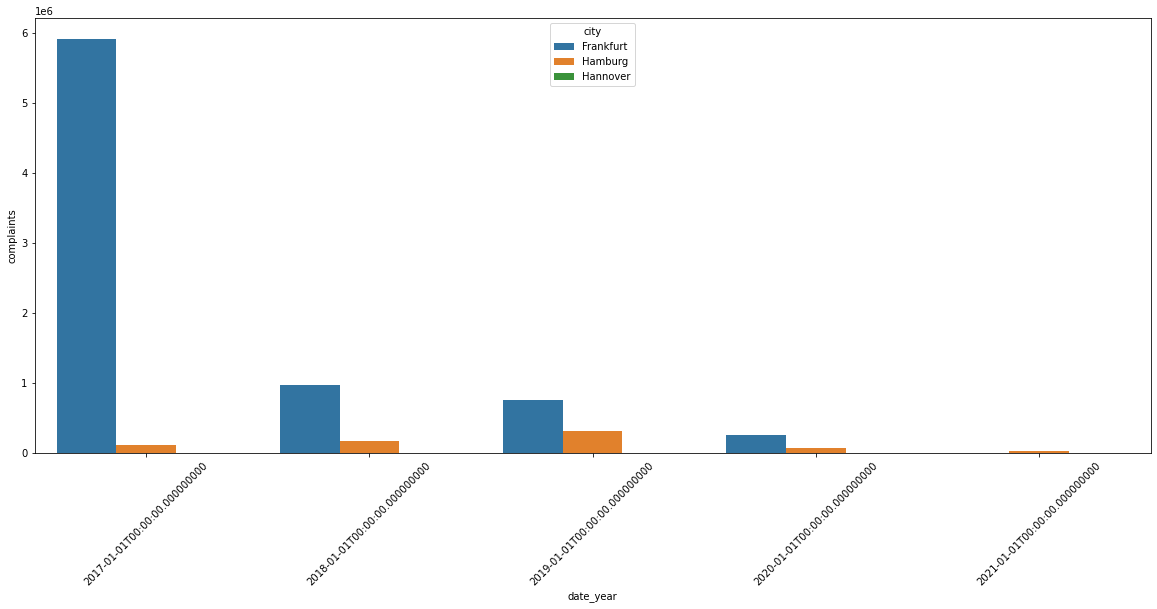

In [225]:
selection_cities = ['Hamburg', 'Frankfurt', 'Hannover']
#selection_cities = ['Hannover', 'Hamburg']

df1 = df_complaints_all[df_complaints_all['city'].isin(selection_cities)][['city','date_year','complaints']]

plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
fig= sns.barplot(data = df1, x='date_year',y='complaints',hue='city')

Text(0.5, 1.0, 'Hannover')

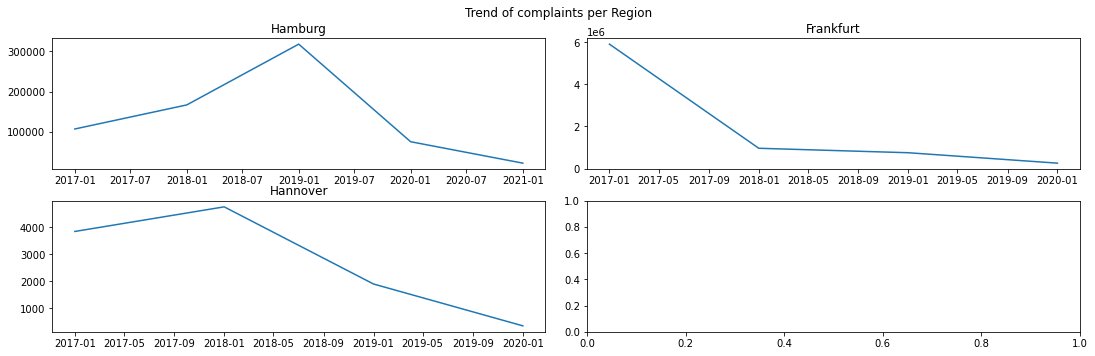

In [226]:
selection_cities = ['Hamburg', 'Frankfurt', 'Hannover']
#selection_cities = ['Hannover', 'Hamburg']

df1 = df_complaints_all[df_complaints_all['city'].isin(selection_cities)][['city','date_year','complaints']]



fig, axs = plt.subplots(2, 2, figsize=(15,5))
fig.suptitle('Trend of complaints per Region')
fig.tight_layout()


x = df1[df1['city'] == 'Hamburg'][['date_year']].values
y = df1[df1['city'] == 'Hamburg'][['complaints']].values
axs[0,0].plot(x, y)
axs[0,0].set_title('Hamburg')

x = df1[df1['city'] == 'Frankfurt'][['date_year']].values
y = df1[df1['city'] == 'Frankfurt'][['complaints']].values
axs[0,1].plot(x, y)
axs[0,1].set_title('Frankfurt')

x = df1[df1['city'] == 'Hannover'][['date_year']].values
y = df1[df1['city'] == 'Hannover'][['complaints']].values
axs[1,0].plot(x, y)
axs[1,0].set_title('Hannover')



Joining complaints and noise 

In [96]:
# Load Noise data
sql_query = 'SELECT * FROM cap_air.noise_data_de'
df_noise_day = pd.read_sql_query(sql_query, conn)
df_noise_day

,Date,LTag(18),LTagrand,LNacht,Lden,LTag(22),Ldn,NAT,r_number,region,s_number,station
0,2017-01-01,NaN,41.3,34.9,42.4,35.4,40.9,0.0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
1,2017-01-02,NaN,36.4,34.9,40.7,30.3,40.0,0.0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
2,2017-01-03,NaN,33.1,NaN,36.0,NaN,35.1,0.0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
3,2017-01-04,36.9,36.5,34.5,41.5,36.8,41.0,0.0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
4,2017-01-05,NaN,35.5,NaN,33.0,NaN,NaN,0.0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
...,...,...,...,...,...,...,...,...,...,...,...,...
405784,2021-12-27,38.6,NaN,NaN,35.6,37.4,35.6,0.0,15,Saarbruecken,1,Saarbruecken
405785,2021-12-28,31.6,NaN,NaN,NaN,30.3,NaN,0.0,15,Saarbruecken,1,Saarbruecken
405786,2021-12-29,NaN,39.8,NaN,37.4,34.8,33.0,0.0,15,Saarbruecken,1,Saarbruecken
405787,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15,Saarbruecken,1,Saarbruecken


In [155]:
# Using only the relevant columns  with MAX()
df_noise_day_new = df_noise_day[['Date', 'Lden', 'LTag(22)', 'LNacht','r_number', 'region','s_number','station']]
cities = ['Hamburg','Frankfurt','Hannover']

df_noise_day_new_max = df_noise_day_new[['Date','r_number','region','s_number','LNacht','Lden','LTag(22)']][df_noise_day_new['region'].isin(cities)].groupby([pd.Grouper(key='Date', freq='Y'),'region']).max().reset_index()
df_noise_day_new_max


,Date,region,r_number,s_number,LNacht,Lden,LTag(22)
0,2017-12-31,Frankfurt,1,285,79.2,84.4,83.6
1,2017-12-31,Hamburg,16,13,63.8,75.1,74.8
2,2017-12-31,Hannover,5,10,58.9,65.4,61.2
3,2018-12-31,Frankfurt,1,293,78.1,83.4,75.8
4,2018-12-31,Hamburg,16,15,63.3,74.9,74.2
5,2018-12-31,Hannover,5,11,56.8,64.4,60.7
6,2019-12-31,Frankfurt,1,298,67.6,82.0,80.7
7,2019-12-31,Hamburg,16,15,64.2,72.7,71.8
8,2019-12-31,Hannover,5,11,56.8,63.1,60.1
9,2020-12-31,Frankfurt,1,303,75.0,81.0,81.2


In [156]:
# Using only the relevant columns  with Media()
df_noise_day_new = df_noise_day[['Date', 'Lden', 'LTag(22)', 'LNacht','r_number', 'region','s_number','station']]
cities = ['Hamburg','Frankfurt','Hannover']

df_noise_day_new_median = df_noise_day_new[['Date','r_number','region','s_number','LNacht','Lden','LTag(22)']][df_noise_day_new['region'].isin(cities)].groupby([pd.Grouper(key='Date', freq='Y'),'region']).median().reset_index()
df_noise_day_new_median

,Date,region,r_number,s_number,LNacht,Lden,LTag(22)
0,2017-12-31,Frankfurt,1.0,150.0,41.0,46.6,44.8
1,2017-12-31,Hamburg,16.0,8.0,43.9,51.9,50.1
2,2017-12-31,Hannover,5.0,5.0,45.0,51.3,48.6
3,2018-12-31,Frankfurt,1.0,154.0,42.0,46.6,45.0
4,2018-12-31,Hamburg,16.0,10.0,42.7,51.0,49.4
5,2018-12-31,Hannover,5.0,7.0,42.7,49.0,45.5
6,2019-12-31,Frankfurt,1.0,157.0,41.6,46.2,44.6
7,2019-12-31,Hamburg,16.0,10.5,43.1,51.2,49.6
8,2019-12-31,Hannover,5.0,7.0,43.7,50.7,47.2
9,2020-12-31,Frankfurt,1.0,157.0,39.3,43.4,41.7


In [227]:
#Preparting complaints for joins

df_complaints_all_new = df_complaints_all[['date_year','city','complaints','complainants']].groupby([pd.Grouper(key='date_year', freq='Y'),'city']).max().reset_index()
df_complaints_all_new

,date_year,city,complaints,complainants
0,2017-12-31,Frankfurt,5915945.0,2203.0
1,2017-12-31,Hamburg,107157.0,1950.0
2,2017-12-31,Hannover,3845.0,NaN
3,2018-12-31,Frankfurt,962620.0,3115.0
4,2018-12-31,Hamburg,166943.0,2311.0
5,2018-12-31,Hannover,4756.0,NaN
6,2019-12-31,Frankfurt,750646.0,2037.0
7,2019-12-31,Hamburg,317998.0,1517.0
8,2019-12-31,Hannover,1900.0,NaN
9,2020-12-31,Frankfurt,254793.0,1274.0


join noise-max and complatins data frames


In [228]:
joined_df_max = df_noise_day_new_max.join(df_complaints_all_new)
joined_df_max.drop('city', inplace=True, axis=1)
joined_df_max.drop('date_year', inplace=True, axis=1)
joined_df_max.drop('s_number', inplace=True, axis=1)

joined_df_max

,Date,region,r_number,LNacht,Lden,LTag(22),complaints,complainants
0,2017-12-31,Frankfurt,1,79.2,84.4,83.6,5915945.0,2203.0
1,2017-12-31,Hamburg,16,63.8,75.1,74.8,107157.0,1950.0
2,2017-12-31,Hannover,5,58.9,65.4,61.2,3845.0,NaN
3,2018-12-31,Frankfurt,1,78.1,83.4,75.8,962620.0,3115.0
4,2018-12-31,Hamburg,16,63.3,74.9,74.2,166943.0,2311.0
5,2018-12-31,Hannover,5,56.8,64.4,60.7,4756.0,NaN
6,2019-12-31,Frankfurt,1,67.6,82.0,80.7,750646.0,2037.0
7,2019-12-31,Hamburg,16,64.2,72.7,71.8,317998.0,1517.0
8,2019-12-31,Hannover,5,56.8,63.1,60.1,1900.0,NaN
9,2020-12-31,Frankfurt,1,75.0,81.0,81.2,254793.0,1274.0


join noise-median and complaints

In [229]:
joined_df_median = df_noise_day_new_median.join(df_complaints_all_new)
joined_df_median.drop('city', inplace=True, axis=1)
joined_df_median.drop('date_year', inplace=True, axis=1)
joined_df_median.drop('s_number', inplace=True, axis=1)

joined_df_median

,Date,region,r_number,LNacht,Lden,LTag(22),complaints,complainants
0,2017-12-31,Frankfurt,1.0,41.0,46.6,44.8,5915945.0,2203.0
1,2017-12-31,Hamburg,16.0,43.9,51.9,50.1,107157.0,1950.0
2,2017-12-31,Hannover,5.0,45.0,51.3,48.6,3845.0,NaN
3,2018-12-31,Frankfurt,1.0,42.0,46.6,45.0,962620.0,3115.0
4,2018-12-31,Hamburg,16.0,42.7,51.0,49.4,166943.0,2311.0
5,2018-12-31,Hannover,5.0,42.7,49.0,45.5,4756.0,NaN
6,2019-12-31,Frankfurt,1.0,41.6,46.2,44.6,750646.0,2037.0
7,2019-12-31,Hamburg,16.0,43.1,51.2,49.6,317998.0,1517.0
8,2019-12-31,Hannover,5.0,43.7,50.7,47.2,1900.0,NaN
9,2020-12-31,Frankfurt,1.0,39.3,43.4,41.7,254793.0,1274.0


In [230]:
# removing null values of complaints fra and han 2021
joined_df_max = joined_df_max.dropna(subset=['complaints'])
joined_df_max

joined_df_median = joined_df_median.dropna(subset=['complaints'])
joined_df_median

,Date,region,r_number,LNacht,Lden,LTag(22),complaints,complainants
0,2017-12-31,Frankfurt,1.0,41.0,46.6,44.8,5915945.0,2203.0
1,2017-12-31,Hamburg,16.0,43.9,51.9,50.1,107157.0,1950.0
2,2017-12-31,Hannover,5.0,45.0,51.3,48.6,3845.0,NaN
3,2018-12-31,Frankfurt,1.0,42.0,46.6,45.0,962620.0,3115.0
4,2018-12-31,Hamburg,16.0,42.7,51.0,49.4,166943.0,2311.0
5,2018-12-31,Hannover,5.0,42.7,49.0,45.5,4756.0,NaN
6,2019-12-31,Frankfurt,1.0,41.6,46.2,44.6,750646.0,2037.0
7,2019-12-31,Hamburg,16.0,43.1,51.2,49.6,317998.0,1517.0
8,2019-12-31,Hannover,5.0,43.7,50.7,47.2,1900.0,NaN
9,2020-12-31,Frankfurt,1.0,39.3,43.4,41.7,254793.0,1274.0


Corrrelations of noise and complaints

<AxesSubplot:xlabel='complaints', ylabel='LNacht'>

<AxesSubplot:xlabel='complaints', ylabel='Lden'>

<AxesSubplot:xlabel='Lden', ylabel='complaints'>

<AxesSubplot:xlabel='LNacht', ylabel='complaints'>

<AxesSubplot:xlabel='complaints', ylabel='LNacht'>

<AxesSubplot:xlabel='complaints', ylabel='Lden'>

<AxesSubplot:xlabel='Lden', ylabel='complaints'>

<AxesSubplot:xlabel='LNacht', ylabel='complaints'>

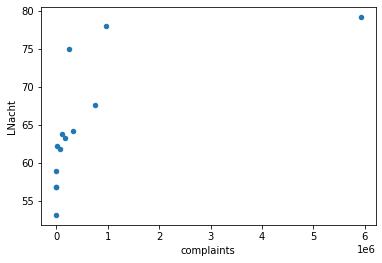

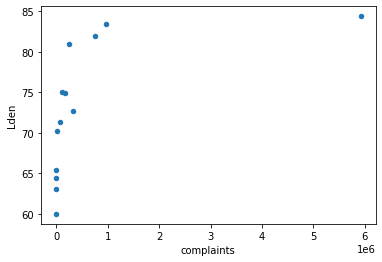

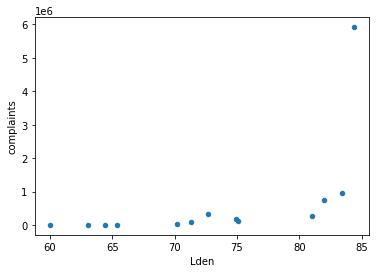

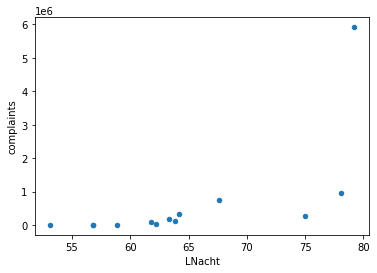

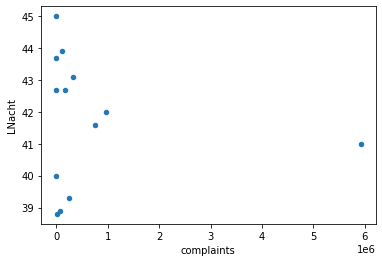

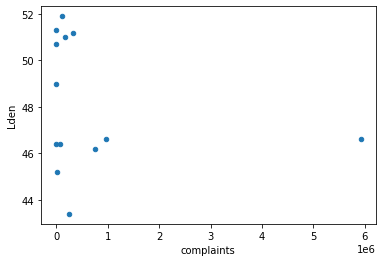

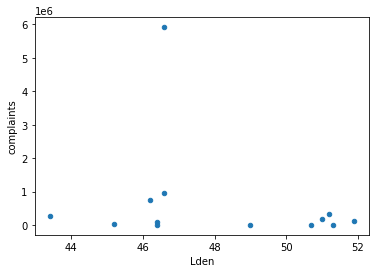

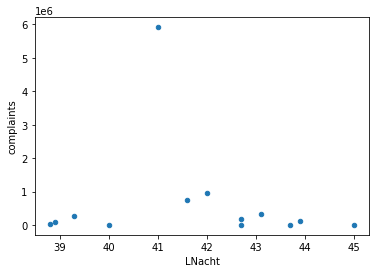

In [239]:
display(joined_df_max.plot(kind='scatter', x='complaints', y='LNacht'))
display(joined_df_max.plot(kind='scatter', x='complaints', y='Lden'));
display(joined_df_max.plot(kind='scatter', x='Lden', y='complaints'));
display(joined_df_max.plot(kind='scatter', x='LNacht', y='complaints'));
display(joined_df_median.plot(kind='scatter', x='complaints', y='LNacht'));
display(joined_df_median.plot(kind='scatter', x='complaints', y='Lden'));
display(joined_df_median.plot(kind='scatter', x='Lden', y='complaints'));
display(joined_df_median.plot(kind='scatter', x='LNacht', y='complaints'))


In [231]:
display(joined_df_max.corr())
display(joined_df_median.corr())

,r_number,LNacht,Lden,LTag(22),complaints,complainants
r_number,1.000000,-0.378243,-0.241735,-0.151070,-0.379758,-0.404930
LNacht,-0.378243,1.000000,0.942962,0.884707,0.646653,0.501679
Lden,-0.241735,0.942962,1.000000,0.971797,0.552832,0.613294
LTag(22),-0.151070,0.884707,0.971797,1.000000,0.550567,0.380008
complaints,-0.379758,0.646653,0.552832,0.550567,1.000000,0.283368
complainants,-0.404930,0.501679,0.613294,0.380008,0.283368,1.000000


,r_number,LNacht,Lden,LTag(22),complaints,complainants
r_number,1.000000,-0.013963,0.410406,0.598036,-0.379758,-0.404930
LNacht,-0.013963,1.000000,0.885063,0.767121,-0.111188,0.575187
Lden,0.410406,0.885063,1.000000,0.933273,-0.214662,0.176958
LTag(22),0.598036,0.767121,0.933273,1.000000,-0.175885,0.127030
complaints,-0.379758,-0.111188,-0.214662,-0.175885,1.000000,0.283368
complainants,-0.404930,0.575187,0.176958,0.127030,0.283368,1.000000


too few com complaints data (makes no sense):
- LNacht and complaints 0.64 (max) - correlation?
- Lden and complaints 0.55 (max) - weak correlation?

- LNacht and complaints 0.11 (media) - no correlation
- Lden and complaints 0.21 (median) - no correlation 

Linear Regression